In [1]:
import pandas as pd
import numpy as np
import cv2
from tensorflow import keras
import tensorflow as tf
import os

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [4]:
import tensorflow.keras.utils as utils

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout ,Flatten,  MaxPooling2D, Conv2D

# Student Dataset

In [6]:
data_path = 'C:\\Users\\nanda\\Downloads\\students'

data_dir_list = os.listdir(data_path)
#data_dir_list
print(str(len(data_dir_list))+' classes are',data_dir_list)

img_data = []
for dataset in data_dir_list:
    img_list = os.listdir(data_path+'/'+dataset)
    print('number of images in '+str(dataset)+' = ',len(img_list))
    for img in img_list:
        img = cv2.imread(data_path+'/'+dataset+'/'+img)
        img = cv2.resize(img,(48,48))
        
        img_data.append(img)

# plt.imshow(img_data[0])
img_data = np.array(img_data)
# print(img_data)
# print(img_data[0].shape)
print(img_data.shape)
# Normalization (essential for neural nets)
img_data = img_data.astype('float32')
img_data = img_data/255
# img_data.shape
# print('shape of image', (img_data.shape[1],img_data.shape[2]))
print('num of images ', img_data.shape[0])

6 classes are ['bored', 'confused', 'drowsy', 'frustrated', 'interested', 'Looking Away']
number of images in bored =  250
number of images in confused =  250
number of images in drowsy =  250
number of images in frustrated =  250
number of images in interested =  250
number of images in Looking Away =  250
(1500, 48, 48, 3)
num of images  1500


# Labeling images

[0 0 0 ... 5 5 5]


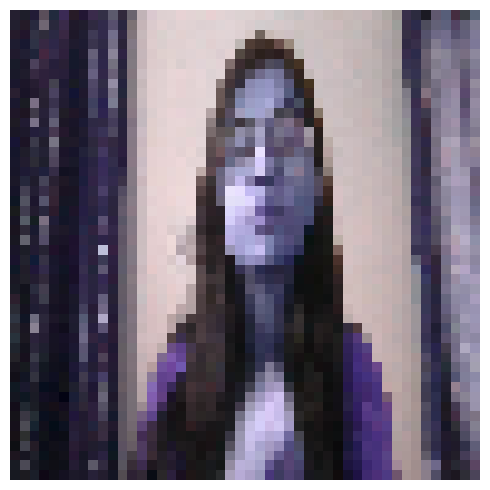

bored


In [7]:
label_text = {0:'bored', 1:'confused', 2: 'drowsy',
                         3:'frustrated', 4:'interested',
                         5: 'Looking Away'}
labels = np.ones((img_data.shape[0],),dtype='int64')

labels[0:250]=0 
labels[250:500]=1 
labels[500:750]=2 
labels[750:1000]=3 
labels[1000:1250]=4 
labels[1250:1500]=5 

print(labels)

def plotImages(images_arr):
    fig,axes = plt.subplots(1,1,figsize=(5,5))
    axes.imshow(images_arr)
    axes.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(img_data[0])
print(label_text[labels[0]])

# Creating CNN Model

In [8]:
def create_model(optim):
    input_shape=(48,48,3)

    model = Sequential()
    model.add(Conv2D(16, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (5, 5), padding='same', activation = 'relu'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    
    return model



# Model Training

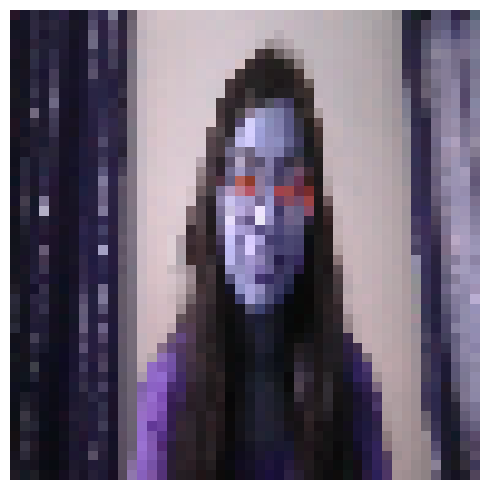

[0. 0. 0. 1. 0. 0.]





Summary of model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        12832     
                                                                 
 activation (Activation)     (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Co

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import cross_val_predict, cross_val_score
from tensorflow.keras.optimizers import *

aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.2,
                        zoom_range=0.2, horizontal_flip=True,
                        fill_mode='nearrest')


Y = utils.to_categorical(labels, len(label_text))
# print(len(Y))
# print(img_data)
# print(Y)
# print(Y.shape)

x,y = shuffle(img_data,Y,random_state = 3)
# print(x)
# print(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test

plotImages(x[0])
print(y[0])

aug.fit(X_train)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.000005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

batch_size = 32 #batch size of 32 performs the best.
epochs = 100
optims = [
    Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    Adam(0.001),
]


model = create_model(optims[1]) 
print("\n\n\nSummary of model:")
model.summary()
print("\n\n\nModel Training:")
model.fit(x=X_train, y= y_train, validation_split=0.1, batch_size=32, 
          epochs=100, shuffle=True, verbose=2, callbacks=callbacks 
         )

In [10]:
# from sklearn.model_selection import KFold

In [11]:
# kf = KFold(n_splits=5, shuffle=False)

# Model Testing and Prediction

10/10 [==============================] - 0s 9ms/step
[[9.9980599e-01 1.3630250e-07 6.4243368e-06 1.7052225e-04 1.6982820e-05
  4.7650961e-08]
 [3.3037303e-08 1.3873290e-08 7.0641953e-08 4.0781873e-07 7.9908403e-08
  9.9999940e-01]
 [2.2897065e-13 1.0000000e+00 2.2806407e-13 1.0135933e-12 7.7447092e-20
  4.5276352e-09]
 ...
 [5.7444371e-02 8.5150660e-08 9.4252074e-01 8.7712479e-08 8.0900859e-09
  3.4645764e-05]
 [1.2975913e-01 2.8185556e-07 8.7016821e-01 1.5126722e-07 2.2002645e-08
  7.2143950e-05]
 [5.1245041e-04 6.4682442e-09 3.7785057e-08 3.8103226e-05 9.9944919e-01
  2.5064315e-07]]
(300, 6)


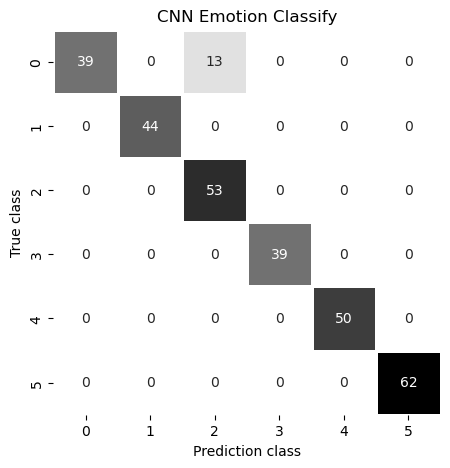

Test Loss: 0.09732265770435333
Test accuracy: 0.9566666483879089
(1, 48, 48, 3)
1/1 [==============================] - 0s 28ms/step
[[1.2586536e-01 3.0900620e-07 8.7404388e-01 1.8704442e-07 2.8613565e-08
  9.0209163e-05]]
[[1. 0. 0. 0. 0. 0.]]
10/10 [==============================] - 0s 11ms/step


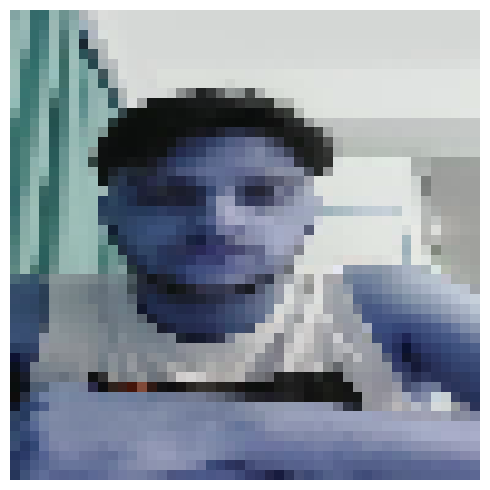

1/1 [==============================] - 0s 42ms/step
[[1.2586536e-01 3.0900620e-07 8.7404388e-01 1.8704442e-07 2.8613565e-08
  9.0209163e-05]]
drowsy
(1, 48, 48, 3)


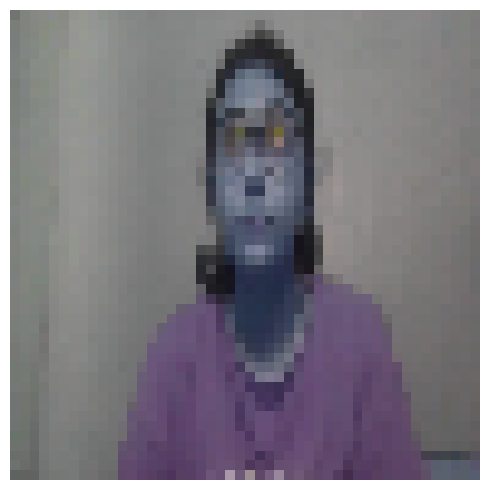

1/1 [==============================] - 0s 27ms/step
<class 'numpy.ndarray'>
[1.2586536e-01 3.0900620e-07 8.7404388e-01 1.8704442e-07 2.8613565e-08
 9.0209163e-05]
drowsy


In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import pandas as pd

#results = model.predict_classes(X_test)
#cm = confusion_matrix(np.where(y_test == 1)[1], results)
results = model.predict(X_test)
print(results)
print(results.shape)
# print(X_train)
# print(X_train.shape)
# print(x_test)
# print(x_test.shape)
# print(y_train)
# print(y_train.shape)
# print(y_test)
# print(y_test.shape)
predicted_classes = np.argmax(results, axis=1)

# Assuming your y_test is one-hot encoded, use np.argmax to get the true classes
true_classes = np.argmax(y_test, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

label_mapdisgust = ['bored','confused','drowsy','frustrated','interested','Looking Away']
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                     columns = label_mapdisgust
                    )
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[3:4]
print (test_image.shape)

print(model.predict(test_image))
#print(model.predict_classes(test_image))
print(y_test[3:4])

#predict
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
multilabel_confusion_matrix(y_test, y_pred )

plotImages(X_test[3])
predictions = model.predict(test_image)
print(predictions)
ans = np.argmax(predictions)
print(label_text[ans])


test_img = X_test[1:2]
print(test_img.shape)
plotImages(X_test[1])
predictions = (model.predict(test_image)[0])
ans = np.argmax(predictions)
print(type(predictions))
print(predictions)
print(label_text[ans])

In [13]:
# for dataset in data_dir_list:
#     img_list = os.listdir(data_path+'/'+dataset)
#     print('number of images in '+str(dataset)+' = ',len(img_list))

# Saving model

In [14]:
from tensorflow.keras.models import load_model
z=load_model('model1.h5')
zscore=z.evaluate(X_test, y_test, verbose=0)
if((os.path.isfile('model.h5') is False)or(score[1]>zscore[1])):
    model.save('model1.h5')

In [15]:
z=model.evaluate(x_test,y_test)
z[1]

10/10 [==============================] - 0s 7ms/step - loss: 0.0973 - accuracy: 0.9567


0.9566666483879089